In [170]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [171]:
# Import the CSVs to Pandas DataFrames
file_path = Path("test_data.csv")
test_data = pd.read_csv(file_path, index_col="name")
test_data

,price,market_cap,volume
name,,,
BTC,15258.00,282722040430,8907998000
ETH,400.00,50530052456,4024715113
LINK,12.50,4870588545,667605856
DOT,4.35,4053253172,173888050
S&P 500,3509.43,27000000000000,2168000000


<AxesSubplot:xlabel='name'>

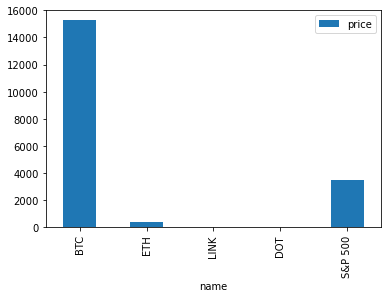

In [172]:
test_plot = test_data.plot.bar(y="price")
test_plot

In [173]:
correlation = test_data.corr()
correlation

,price,market_cap,volume
price,1.000000,-0.018449,0.907353
market_cap,-0.018449,1.000000,-0.152406
volume,0.907353,-0.152406,1.000000


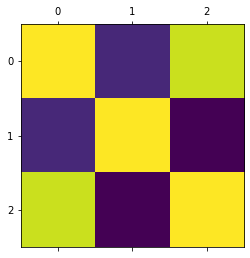

In [174]:
correlation_map = plt.matshow(test_data.corr())
plt.show()

In [175]:
# Define Panel Visualization Functions
def test_bar():
    test_bar = plt.test_data.plot.bar(y="price")
    fig_test_bar = plt.figure()
    plt.close(fig_test_bar)
    return plt.test_data.plot.bar

def correlation_map():
    correlation_map = plt.matshow(test_data.corr())
    fig_correlation_map = plt.figure()
    plt.close(fig_correlation_map)
    return plt.matshow(test_data.corr())


In [176]:
row_1 = pn.Row(
    test_bar(),
row_2 = pn.Row(
    correlation_map(), test_bar()
)

column = pn.Column(
    "##User Input",
    test_bar(),
    correlation_map()
)
  
title = pn.pane.Markdown(
    " #Crypto Analyzer",
    background="#969696", 
    width=400, 
    height=50
)

test_dashboard = pn.Tabs(
    ("Overview"),
    ("Coin Selection", column),
    ("Returns and Market Cap", test_bar),
    ("Correlation", correlation_map),
    ("Stand Dev Beta", test_bar),
    ("Fourth Result", correlation_map),
    ("Conclusion"),
    dynamic=True
)
test_dashboard_final = pn.Column(title, test_dashboard)

SyntaxError: invalid syntax (<ipython-input-176-63a16a8490f3>, line 7)

In [177]:
test_dashboard_final.servable()

Column
    [0] Markdown(str, background='#969696', height=50, sizing_mode='fixed', width=400)
    [1] Tabs(dynamic=True)
        [0] Markdown(str)
        [1] Column
            [0] Markdown(str)
            [1] Str(AxesImage)
            [2] Str(AxesImage)
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(AxesImage, name='interactive02157')
        [3] Column
            [0] Column()
            [1] Row
                [0] Str(AxesImage, name='interactive02163')
        [4] Column
            [0] Column()
            [1] Row
                [0] Str(AxesImage, name='interactive02169')
        [5] Column
            [0] Column()
            [1] Row
                [0] Str(AxesImage, name='interactive02175')
        [6] Markdown(str)